# Principles of Data Science

### Lecture 1: Understanding Data

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

## Admin

- Introductions
- Tunes ([link to google sheet](https://docs.google.com/spreadsheets/d/1auncOPwJPZOZPFKvnC7aGbEqU40IBMnjcgc5BO8iY5o/edit?usp=sharing))
- Module format
  - [Moodle Page](https://www.vle.cam.ac.uk/course/view.php?id=252189#section-1)
  - [GitLab Repo](https://gitlab.developers.cam.ac.uk/phy/data-intensive-science-mphil/s1_principles_of_data_science) - you need to register and request access
  - Lecture Notes (on moodle)
  - Problem Sheets (on moodle) + Supervisions
  - Lecture notebooks (on GitLab)
  - Office hours (Wednesday mornings 10am - 12pm in Rutherford 951)
  - Assessment (Coursework + Exam)
- Reading
 

# Course Overview

**24 Lectures in Total**

- Part 1: Understanding Data (2 Lectures)
- Part 2: Mathematical Foundations (6 Lectures)
- Part 3: Classical Statistics (12 Lectures)
- Part 4: Advanced Topics (4 Lectures)



# Part 1: Understanding Data

## Datasets

<font color="green"><it>See handwritten notes in lectures</it></font>
- A dataset is typically a <font color=blue>*sample*</font>, $S$
- Normally a subset of a bigger <font color=blue>*population*</font>, $P$
- These depend on some underlying <font color=blue>*distribution*</font>, $p$
- Individual events are <font color=blue>*independent*</font> and <font color=blue>*identically distributed*</font> (i.i.d.)

### Histograms
<font color="green"><it>See handwritten notes in lectures</it></font>
- histogram bins
- histogram density
- histogram weights

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(210187)

### A one-dimensional histogram

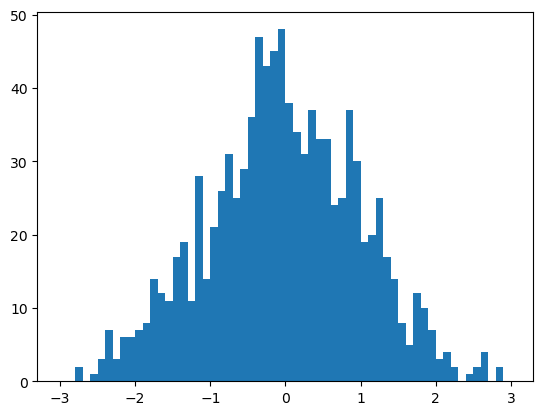

In [2]:
x = np.random.normal(size=1000)
_ = plt.hist(x, range=(-3,3), bins=60)

### Using the seaborn style

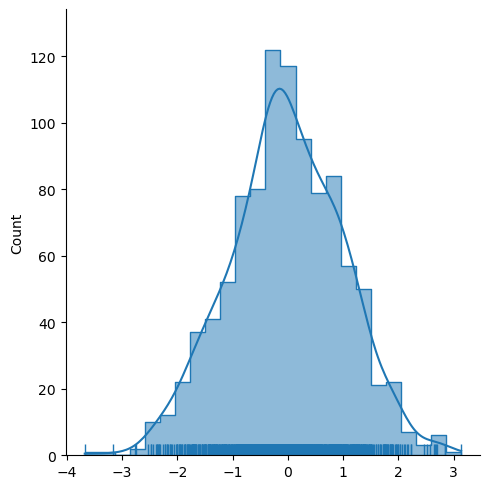

In [3]:
import seaborn as sns
_ = sns.displot(x, element="step", kde=True, rug=True)

### Two-dimensional histogram


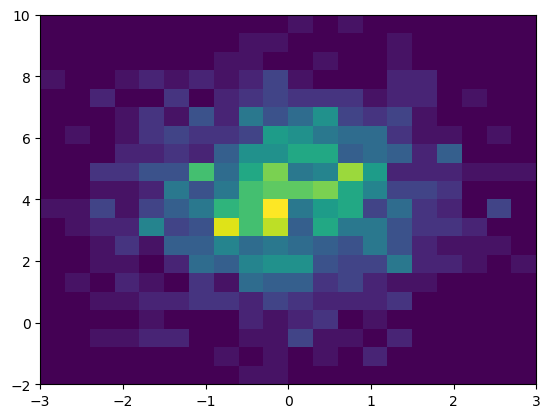

In [4]:
y = np.random.normal(4,2, size=1000)
_ = plt.hist2d(x, y, range=((-3,3),(-2,10)), bins=20)

### Errors on histograms
- Count in each bin so <font color=blue>Poisson distributed</font>
- Error is the square root of the count
- *We will revisit the Poisson distribution and errors later*

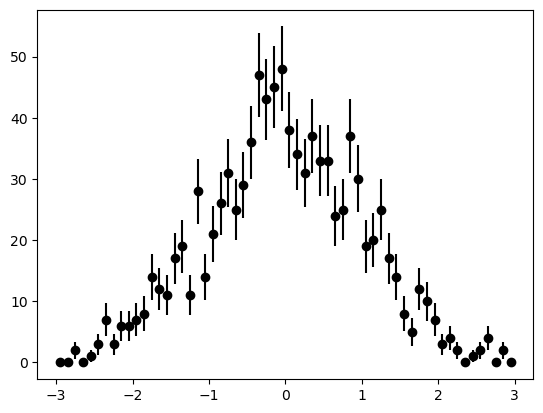

In [5]:
nh, xe = np.histogram(x, range=(-3,3), bins=60)
cx = 0.5*(xe[:-1] + xe[1:])
_ = plt.errorbar( cx, nh, yerr=nh**0.5, fmt='ko' )

### Histograms with weights
- bin count is now sum of weights in the bin, $\sum w_i$
- error is no longer the square root of the count but $\sqrt{ \sum w_i^2 }$

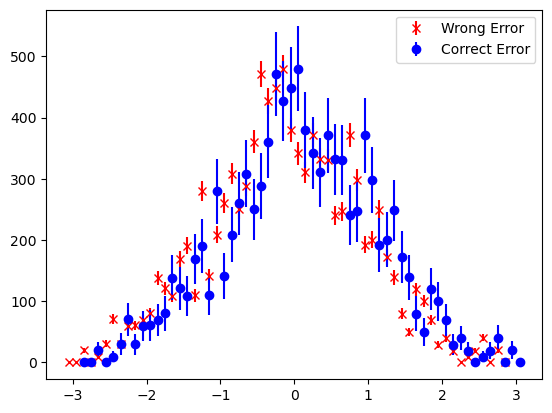

In [6]:
w = np.random.uniform(9.5,10.5,size=1000)
nh, xe = np.histogram(x, range=(-3,3), bins=60, weights=w) 
nh2, xe = np.histogram(x, range=(-3,3), bins=60, weights=w**2)
plt.errorbar( cx-0.1, nh, nh**0.5, fmt='rx', label='Wrong Error')
plt.errorbar( cx+0.1, nh, nh2**0.5, fmt='bo', label='Correct Error')
_ = plt.legend() 

### Histograms as probability densities
- scaled to give prob density:
$\sum_b w_b p_b = 1$

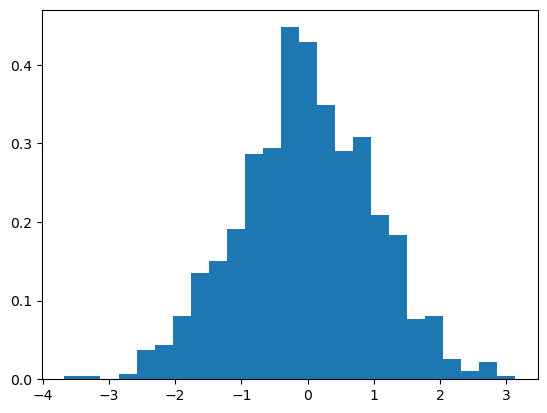

In [7]:
_ = plt.hist( x, bins='auto', density=True ) 

In [8]:
# code for making dataframe
import os
import pandas as pd
regen = True
if regen or not os.path.exists('data/class.pkl'):
    size = 500
    df = pd.DataFrame( columns=['Height','Weight','Gender','Distance','Age','Day Of Birth'])
    
    df['Gender'] = np.random.choice(['M','F','NB'], p=[0.45,0.45,0.1], size=size)
    
    nm = len(df.query("Gender=='M'"))
    nf = len(df.query("Gender=='F'"))
    nn = len(df.query("Gender=='NB'"))
    
    df.loc[ df.Gender=='M', 'Height'] = np.random.normal(175, 6.35, size=nm )
    df.loc[ df.Gender=='F', 'Height'] = np.random.normal(162, 5.59, size=nf )
    df.loc[ df.Gender=='NB', 'Height'] = np.random.normal(168, 6, size=nn )
    
    df['Weight'] = 0.5*df['Height'] + np.random.normal(0,10,size=size)
    
    df['Age'] = np.random.randint(21,30,size=size)
    
    df['Distance'] = np.random.exponential(1.2,size=size)

    df['Day Of Birth'] = np.random.choice( ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], size=size)
    
    df = df.astype( {'Height': np.float64, 'Weight': np.float64, 'Gender': str, 'Distance': np.float64, 'Age': np.int32, 'Day Of Birth': str } )

    print(df)
    
    os.system('mkdir -p data')
    df.to_pickle('data/class.pkl')



         Height     Weight Gender  Distance  Age Day Of Birth
0    158.733745  96.377157      F  0.757757   23          Sun
1    148.116875  62.718173      F  1.536026   23          Fri
2    160.267188  75.680195     NB  0.752851   22          Fri
3    183.687279  96.008974      M  1.000731   21          Thu
4    171.136394  76.824553      M  1.428973   28          Tue
..          ...        ...    ...       ...  ...          ...
495  185.976881  85.713709      M  0.198725   28          Mon
496  173.285989  90.281529      M  0.557051   26          Tue
497  163.626104  82.561855      F  2.159282   25          Thu
498  182.547169  82.830470      M  0.745164   24          Tue
499  155.846073  72.390845      F  2.804736   29          Mon

[500 rows x 6 columns]


### Scatter plots
- Highly useful for investigating correlations / dependencies
- Not so good for sparse datasets


In [19]:
df = pd.read_pickle('data/class.pkl')
print(df)

         Height     Weight Gender  Distance  Age Day Of Birth
0    158.733745  96.377157      F  0.757757   23          Sun
1    148.116875  62.718173      F  1.536026   23          Fri
2    160.267188  75.680195     NB  0.752851   22          Fri
3    183.687279  96.008974      M  1.000731   21          Thu
4    171.136394  76.824553      M  1.428973   28          Tue
..          ...        ...    ...       ...  ...          ...
495  185.976881  85.713709      M  0.198725   28          Mon
496  173.285989  90.281529      M  0.557051   26          Tue
497  163.626104  82.561855      F  2.159282   25          Thu
498  182.547169  82.830470      M  0.745164   24          Tue
499  155.846073  72.390845      F  2.804736   29          Mon

[500 rows x 6 columns]


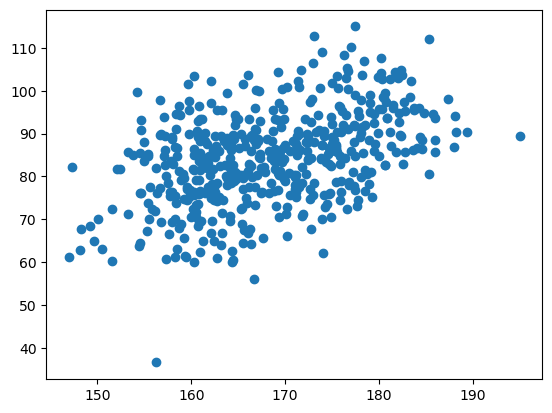

In [10]:
plt.scatter( df['Height'], df['Weight'] )

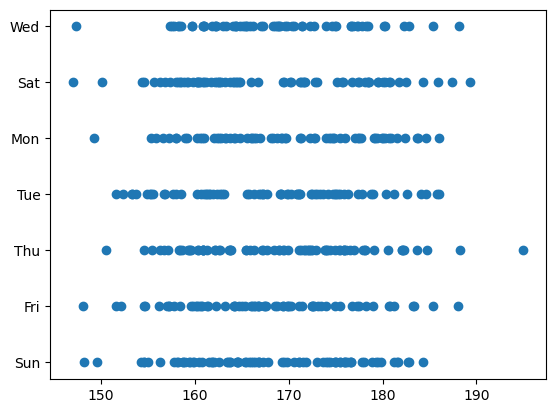

In [11]:
_ = plt.scatter( df['Height'], df['Day Of Birth'])

## Using some [seaborn](https://seaborn.pydata.org/index.html) styles


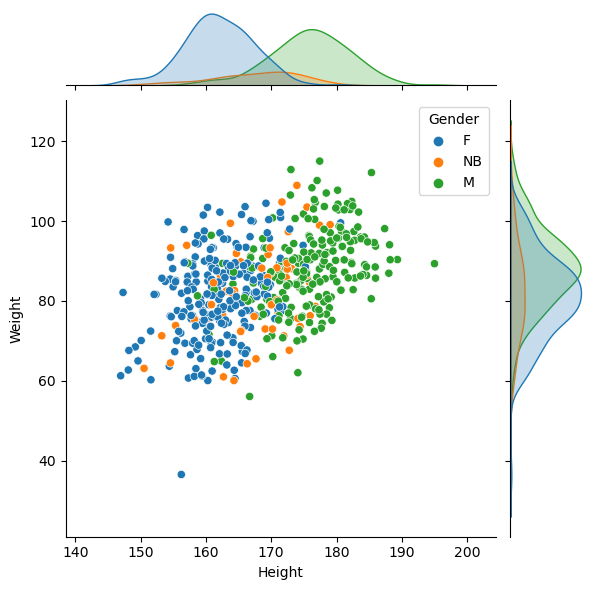

In [12]:
_ = sns.jointplot(df, x='Height', y='Weight', hue='Gender' )

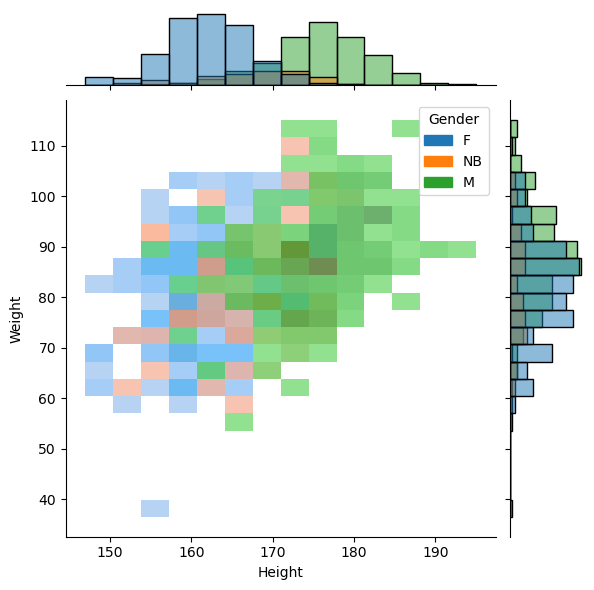

In [13]:
_ = sns.jointplot(df, x='Height', y='Weight', hue='Gender', kind='hist', alpha=0.7 )

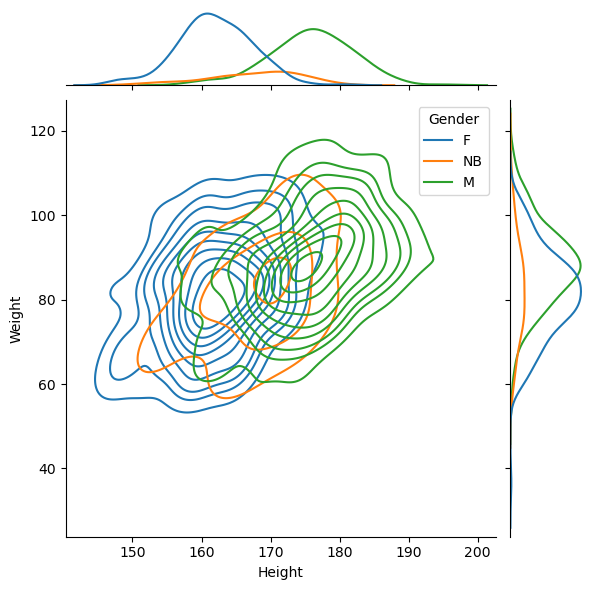

In [14]:
_ = sns.jointplot(df, x='Height', y='Weight', hue='Gender', kind='kde' )

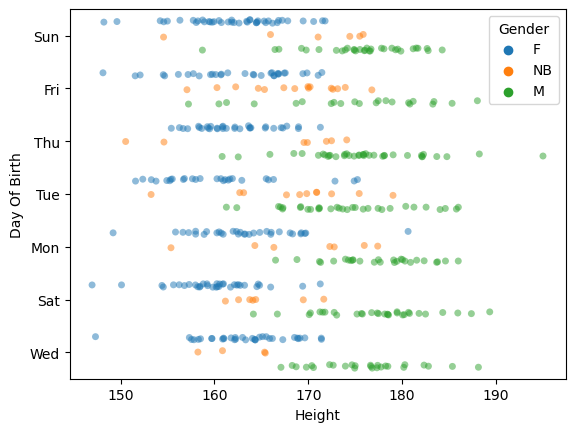

In [15]:
_ = sns.stripplot(df, x='Height', y="Day Of Birth", hue="Gender", dodge=True, alpha=0.5)

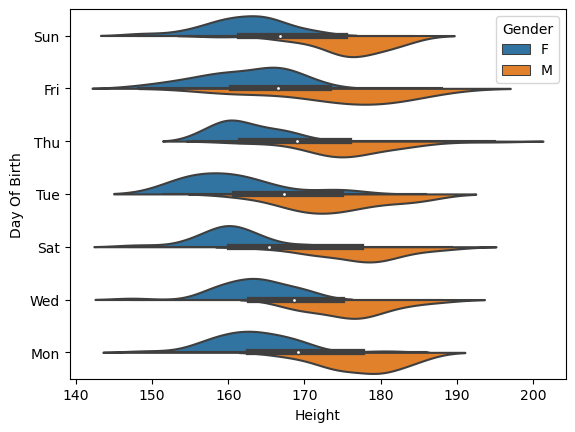

In [16]:
_ = sns.violinplot(df[df['Gender']!='NB'], x='Height', y='Day Of Birth', hue='Gender', split=True)

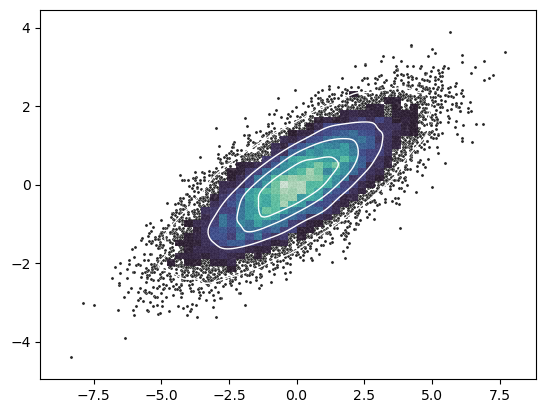

In [17]:
x, y = np.random.multivariate_normal( mean=[0,0], cov=[[4,1.5],[1.5,1]], size=20000 ).T
sns.scatterplot( x=x, y=y, s=5, color="0.15" )
sns.histplot( x=x, y=y, bins=50, pthresh=0.1, cmap="mako", alpha=0.85)
_ = sns.kdeplot( x=x, y=y, levels=5, color='w', linewidths=1)

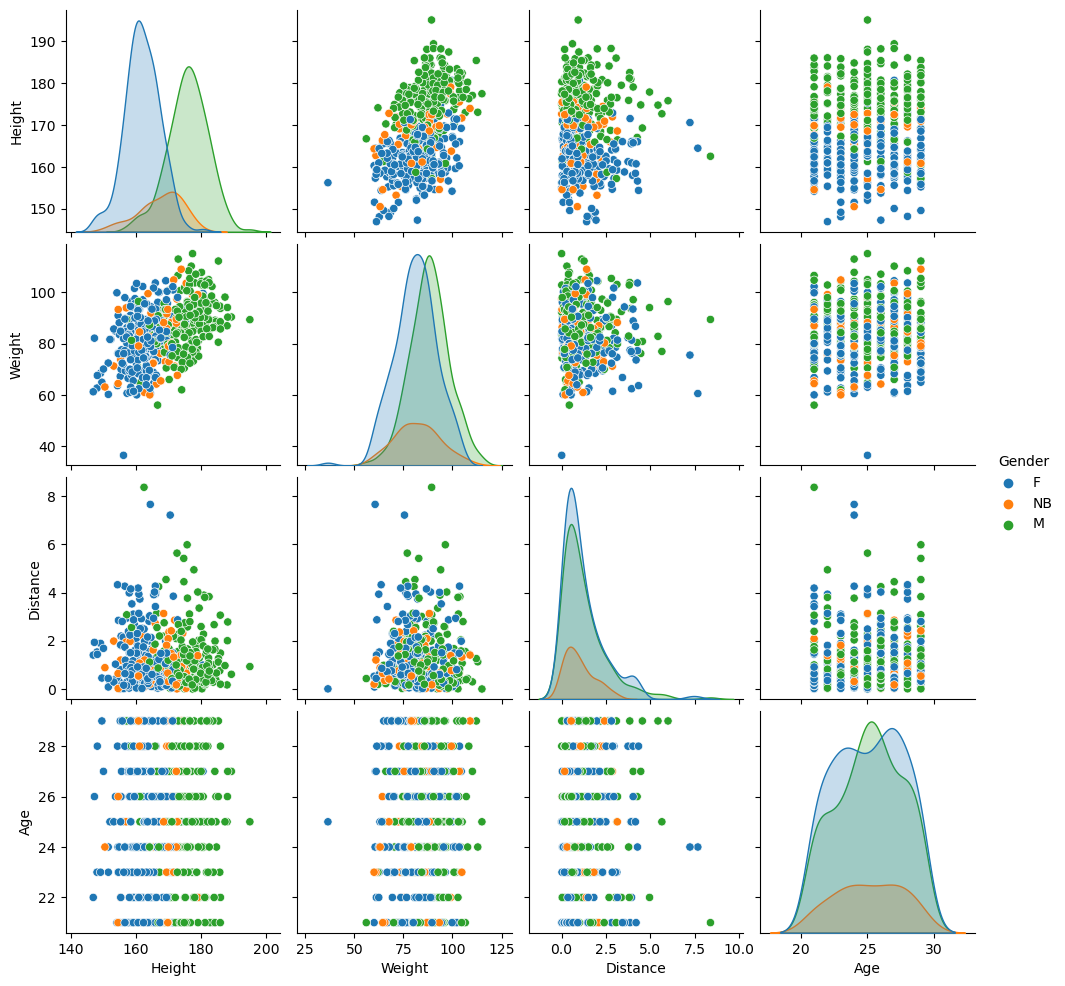

In [18]:
_ = sns.pairplot(df, hue="Gender") 

# <font color="darkred">*Musical interlude...*</font>

### Quantifying data

<font color="green">*Hand-written notes in lectures*</font>

- mean and function mean (unbinned and binned)
- difference between *true* mean, *population* mean, *sample* mean
- spread, variance, standard deviation
- higher moments, skew and curtosis
- covariance and correlation

## End of Lecture 1

By the end of this lecture you should
1. Understand different dataset visualisation methods
2. Be able to compute sample means, variances, standard deviations, covariances and correlations